In [1]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/AN2DL/Lecture 1/

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/AN2DL/Lecture 1


In [2]:
# Fix randomness and hide warnings
seed = 42

import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
os.environ['PYTHONHASHSEED'] = str(seed)
os.environ['MPLCONFIGDIR'] = os.getcwd()+'/configs/'

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=Warning)

import numpy as np
np.random.seed(seed)

import logging

import random
random.seed(seed)

In [3]:
# Import tensorflow
import tensorflow as tf
from tensorflow import keras as tfk
from tensorflow.keras import layers as tfkl
tf.autograph.set_verbosity(0)
tf.get_logger().setLevel(logging.ERROR)
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)
tf.random.set_seed(seed)
tf.compat.v1.set_random_seed(seed)
print(tf.__version__)

2.14.0


In [4]:
# Import other libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [5]:
# Load data
dataset = pd.read_csv('penguins.csv')


In [6]:
# Inspect data
dataset.head()
# dataset.describe()


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [7]:
# Clean data (How to handle missing values?)
df = dataset.dropna()


In [8]:
# Process data (How to manage categorical columns?)
df = pd.get_dummies(df, columns=['species','island','sex'], prefix=['category1', 'category2', 'category3'])
df.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,category1_Adelie,category1_Chinstrap,category1_Gentoo,category2_Biscoe,category2_Dream,category2_Torgersen,category3_FEMALE,category3_MALE
0,39.1,18.7,181.0,3750.0,1,0,0,0,0,1,0,1
1,39.5,17.4,186.0,3800.0,1,0,0,0,0,1,1,0
2,40.3,18.0,195.0,3250.0,1,0,0,0,0,1,1,0
4,36.7,19.3,193.0,3450.0,1,0,0,0,0,1,1,0
5,39.3,20.6,190.0,3650.0,1,0,0,0,0,1,0,1


In [9]:
# Split the dataset into a combined training and validation set, and a separate test set
target = df[['category1_Adelie', 'category1_Chinstrap', 'category1_Gentoo']]
X_train_val, X_test, y_train_val, y_test = train_test_split(
    df,
    target,
    test_size = 90,
    random_state = seed,
    stratify = target
)

# Further split the combined training and validation set into a training set and a validation set
X_train, X_val, y_train, y_val = train_test_split(
    X_train_val,
    y_train_val,
    test_size = 90,
    random_state = seed,
    stratify = y_train_val
)

# Print the shapes of the resulting sets
print('Training set shape:\t',X_train.shape, y_train.shape)
print('Validation set shape:\t',X_val.shape, y_val.shape)
print('Test set shape:\t\t',X_test.shape, y_test.shape)

Training set shape:	 (153, 12) (153, 3)
Validation set shape:	 (90, 12) (90, 3)
Test set shape:		 (90, 12) (90, 3)


In [10]:
print('Target shape', target.shape)

# Calculate the unique target labels and their counts
unique, count = np.unique(target, return_counts=True)
count

Target shape (333, 3)


array([666, 333])

In [11]:
# Compute and store the maximum values for each feature in the training dataset
max_df = X_train.max()
print(max_df)

# Compute and store the minimum values for each feature in the training dataset
min_df = X_train.min()
print(min_df)

bill_length_mm           58.0
bill_depth_mm            21.5
flipper_length_mm       230.0
body_mass_g            6300.0
category1_Adelie          1.0
category1_Chinstrap       1.0
category1_Gentoo          1.0
category2_Biscoe          1.0
category2_Dream           1.0
category2_Torgersen       1.0
category3_FEMALE          1.0
category3_MALE            1.0
dtype: float64
bill_length_mm           33.1
bill_depth_mm            13.1
flipper_length_mm       174.0
body_mass_g            2700.0
category1_Adelie          0.0
category1_Chinstrap       0.0
category1_Gentoo          0.0
category2_Biscoe          0.0
category2_Dream           0.0
category2_Torgersen       0.0
category3_FEMALE          0.0
category3_MALE            0.0
dtype: float64


In [12]:
# Normalise the dataset splits in the range [0,1]
X_train = (X_train - min_df)/(max_df - min_df)
X_val = (X_val - min_df)/(max_df - min_df)
X_test = (X_test- min_df)/(max_df - min_df)

In [13]:
# Inspect the effects of data normalisation
X_train.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,category1_Adelie,category1_Chinstrap,category1_Gentoo,category2_Biscoe,category2_Dream,category2_Torgersen,category3_FEMALE,category3_MALE
count,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000
mean,0.435336,0.472611,0.476891,0.420570,0.437908,0.202614,0.359477,0.516340,0.359477,0.124183,0.490196,0.509804
std,0.220303,0.226841,0.252902,0.231199,0.497759,0.403268,0.481423,0.501374,0.481423,0.330873,0.501546,0.501546
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.257028,0.297619,0.285714,0.236111,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.477912,0.523810,0.410714,0.347222,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
75%,0.630522,0.654762,0.714286,0.583333,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [14]:
# Determine the input shape for the neural network,
# which corresponds to the number of features in the input data
input_shape = X_train.shape[1:]
print(f'Input shape of the network {input_shape}')

# Determine the output shape for the neural network,
# which corresponds to the number of classes in the classification task
output_shape = y_train.shape[1]
print(f'Output shape of the network {output_shape}')

Input shape of the network (12,)
Output shape of the network 3


In [15]:
# Define the batch size, which is the number of samples processed in each training iteration
batch_size = 16

# Define the number of training epochs,
# which is the number of times the entire dataset is passed through the network during training
epochs = 500

Model: "Feedforward"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input (InputLayer)          [(None, 12)]              0         
                                                                 
 Hidden (Dense)              (None, 128)               1664      
                                                                 
 HiddenActivation (Activati  (None, 128)               0         
 on)                                                             
                                                                 
 Output (Dense)              (None, 3)                 387       
                                                                 
 Softmax (Activation)        (None, 3)                 0         
                                                                 
Total params: 2051 (8.01 KB)
Trainable params: 2051 (8.01 KB)
Non-trainable params: 0 (0.00 Byte)
_______________________

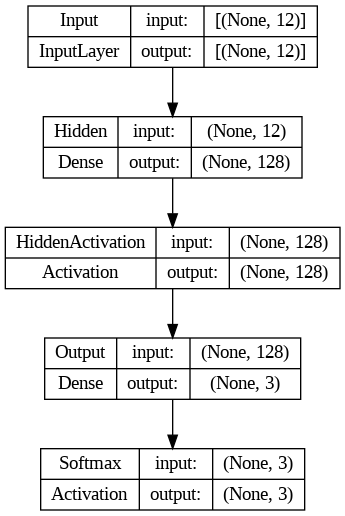

In [16]:
# Build the model
def build_model(
    input_shape,
    output_shape,
    seed=seed
):

    # Fix randomness
    tf.random.set_seed(seed)

    # Build the neural network layer by layer
    input_layer = tfkl.Input(shape=input_shape, name='Input')

    hidden_layer = tfkl.Dense(units=128, name='Hidden')(input_layer)
    hidden_activation = tfkl.Activation('relu', name='HiddenActivation')(hidden_layer)

    output_layer = tfkl.Dense(units=output_shape, name='Output')(hidden_activation)
    output_activation = tfkl.Activation('softmax', name='Softmax')(output_layer)

    # Connect input and output through the Model class
    model = tfk.Model(inputs=input_layer, outputs=output_activation, name='Feedforward')

    # Compile the model
    loss = tfk.losses.CategoricalCrossentropy()
    learning_rate = 0.01
    optimizer = tfk.optimizers.SGD(learning_rate)
    metrics = ['Accuracy']
    model.compile(loss=loss, optimizer=optimizer, metrics=metrics)

    # Return the model
    return model

model = build_model(input_shape, output_shape)
model.summary()
tfk.utils.plot_model(model, expand_nested=True, show_shapes=True)

In [17]:
# Train the model
history = model.fit(
    x = X_train,
    y = y_train,
    batch_size = batch_size,
    epochs = epochs,
    validation_data = (X_val, y_val)
).history

Epoch 1/500
10/10 [==============================] - 3s 98ms/step - loss: 1.0368 - Accuracy: 0.3529 - val_loss: 0.9995 - val_Accuracy: 0.3222
Epoch 2/500
10/10 [==============================] - 0s 41ms/step - loss: 0.9753 - Accuracy: 0.4052 - val_loss: 0.9408 - val_Accuracy: 0.4778
Epoch 3/500
10/10 [==============================] - 0s 25ms/step - loss: 0.9191 - Accuracy: 0.6993 - val_loss: 0.8874 - val_Accuracy: 0.7333
Epoch 4/500
10/10 [==============================] - 0s 51ms/step - loss: 0.8679 - Accuracy: 0.7843 - val_loss: 0.8376 - val_Accuracy: 0.8000
Epoch 5/500
10/10 [==============================] - 0s 38ms/step - loss: 0.8208 - Accuracy: 0.8105 - val_loss: 0.7914 - val_Accuracy: 0.8333
Epoch 6/500
10/10 [==============================] - 0s 37ms/step - loss: 0.7760 - Accuracy: 0.8627 - val_loss: 0.7482 - val_Accuracy: 0.9000
Epoch 7/500
10/10 [==============================] - 0s 26ms/step - loss: 0.7338 - Accuracy: 0.8889 - val_loss: 0.7075 - val_Accuracy: 0.9000
Epoch 

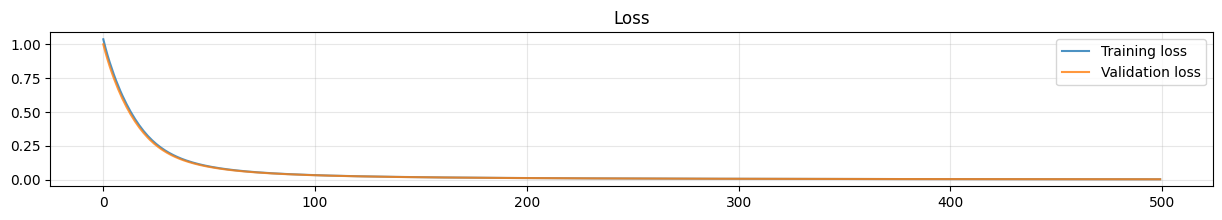

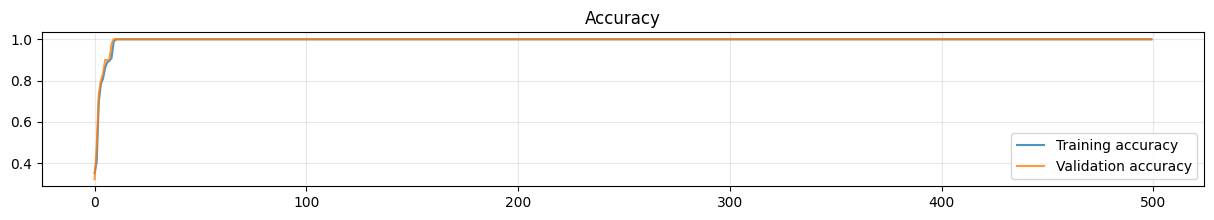

In [18]:
# Create and display plots for training and validation loss
plt.figure(figsize=(15,2))
plt.plot(history['loss'], label='Training loss', alpha=.8)
plt.plot(history['val_loss'], label='Validation loss', alpha=.8)
plt.title('Loss')
plt.legend()
plt.grid(alpha=.3)

# Create and display plots for training and validation accuracy
plt.figure(figsize=(15,2))
plt.plot(history['Accuracy'], label='Training accuracy', alpha=.8)
plt.plot(history['val_Accuracy'], label='Validation accuracy', alpha=.8)
plt.title('Accuracy')
plt.legend()
plt.grid(alpha=.3)
plt.show()

In [19]:
# Make inferece
train_predictions = model.predict(X_train, verbose=0)
train_predictions = np.argmax(train_predictions,axis=-1)

train_gt = np.argmax([y_train],axis=-1)
train_gt = train_gt.reshape(train_gt.shape[1:])
# train_gt.shape
# train_predictions.shape
train_accuracy = accuracy_score(train_gt, train_predictions)
print(f'Accuracy score over the train set: {round(train_accuracy,4)}')

Accuracy score over the train set: 1.0


In [20]:
# Validation set prediction
val_predictions = model.predict(X_val, verbose=0)
val_predictions = np.argmax(val_predictions, axis=-1)

val_gt = np.argmax([y_val], axis=-1)

val_gt = val_gt.reshape(val_gt.shape[1:])
val_accuracy = accuracy_score(val_gt, val_predictions)
print(f'Accuracy score over the validation set: {round(val_accuracy, 4)}')

Accuracy score over the validation set: 1.0


In [21]:
# Test set prediction
test_predictions = model.predict(X_test, verbose=0)
test_predictions = np.argmax(test_predictions, axis=-1)

test_gt = np.argmax([y_test], axis=-1)
test_gt = test_gt.reshape(test_gt.shape[1:])

test_accuracy = accuracy_score(test_gt, test_predictions)
print(f'Accuracy score over the test set: {round(test_accuracy, 4)}')

Accuracy score over the test set: 1.0
